In [53]:
import pandas as pd
import matplotlib
import os
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [4]:
dropped = pd.read_csv(os.getcwd()+"/Dropped_companies.csv")
downloaded = pd.read_csv(os.getcwd()+"/metadata.csv")
downloaded  = downloaded.loc[:, ~downloaded.columns.str.contains('^Unnamed')]
dropped  = dropped.loc[:, ~dropped.columns.str.contains('^Unnamed')]

In [10]:
### Soo we see that in the run, 159 companies were dropped
print(dropped.shape)
print(downloaded.shape)

(159, 3)
(3686, 7)


In [125]:
##Analysis of Dropped
print(dropped.columns)
#check if there is more than one row for an id 
assert len(dropped.drop_duplicates()) == len(dropped)
print(len(dropped.drop_duplicates()))
      
#check percentage of different aborting reasons
print(dropped['Reason'].value_counts())

#Find the ones that we need to redo
Redo = dropped[dropped['Reason'] != '404']
Redo.to_csv(os.getcwd() + "/to_redo.csv",index=False)

Index(['ID', 'Name', 'Reason'], dtype='object')
159
404                             76
NoSubmissions                   51
No Annual Report files found    28
Unknown error                    3
Indexing_error                   1
Name: Reason, dtype: int64


In [117]:
dropped_redo = pd.read_csv(os.getcwd()+"/Dropped_companies_redo.csv")
downloaded_redo = pd.read_csv(os.getcwd()+"/metadata_redo.csv")
downloaded_redo  = downloaded_redo.loc[:, ~downloaded_redo.columns.str.contains('^Unnamed')]
dropped_redo  = dropped_redo.loc[:, ~dropped_redo.columns.str.contains('^Unnamed')]
print("After:",Redo.shape,downloaded.shape)
print("Before:",dropped_redo.shape,downloaded_redo.shape)
print(dropped_redo['Reason'].value_counts())
print(Redo['Reason'].value_counts())

After: (83, 3) (3686, 7)
Before: (78, 3) (48, 7)
NoSubmissions                   50
No Annual Report files found    25
Indexing_error                   3
Name: Reason, dtype: int64
NoSubmissions                   51
No Annual Report files found    28
Unknown error                    3
Indexing_error                   1
Name: Reason, dtype: int64


In [118]:
downloaded_redo[downloaded_redo['ID']=='GAVI']

,ID,Name,Report,Date,Year,Version,Link


Index(['ID', 'Name', 'Report', 'Date', 'Year', 'Version', 'Link'], dtype='object')
Summary statistics for number of years reported for each ID 
 count    416.000000
mean       4.024038
std        2.989040
min        1.000000
25%        2.000000
50%        3.000000
75%        5.000000
max       19.000000
Name: ID, dtype: float64


<AxesSubplot:xlabel='ID', ylabel='Count'>

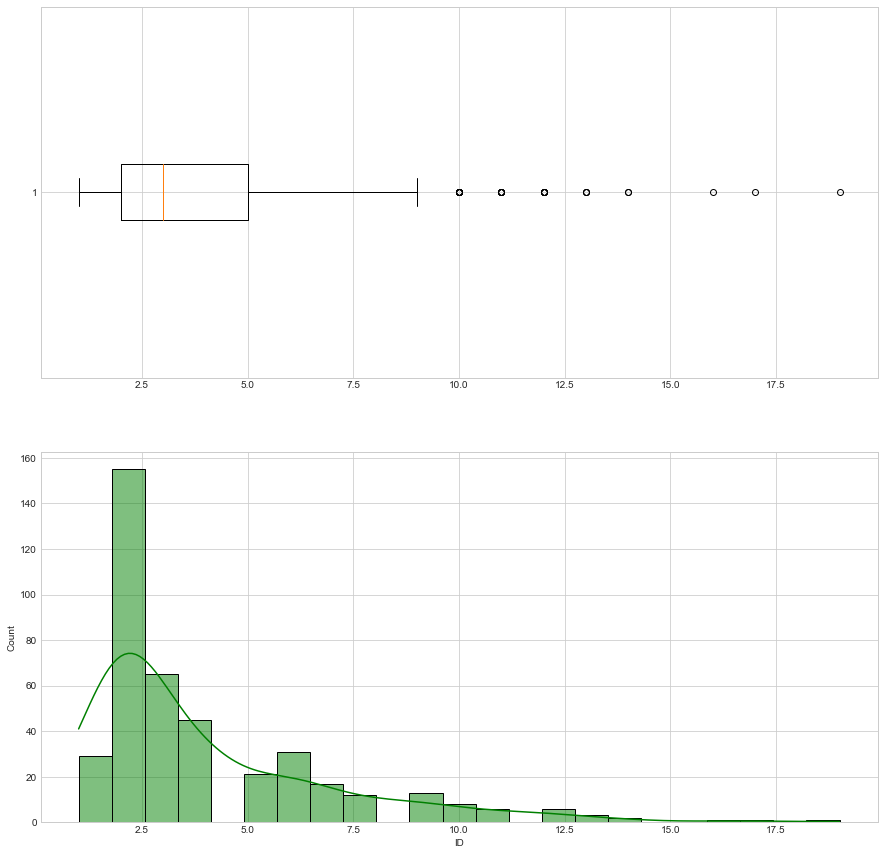

In [121]:
print(f"{downloaded.columns}")
#Check the records we found
#Number of years the company submitted something
ID_year_pairs = downloaded[["ID","Year"]]
#print(f"{ID_year_pairs}")
ID_year_pairs = ID_year_pairs.drop_duplicates()
years_reported = ID_year_pairs.groupby("ID")["ID"].count()
print(f"Summary statistics for number of years reported for each ID \n {years_reported.describe()}")
fig, ax = plt.subplots(2,figsize=(15, 15))
#ax[0].hist(years_reported)
#print(f"{ID_year_pairs}")
descript = ax[0].boxplot(years_reported,notch=False,vert=False)
sns.histplot(ax = ax[1],x=years_reported,color=['green'],kde=True)
#sns.kdeplot(ax = ax[1],x=years_reported,color='blue',hist=True)

Index(['ID', 'Name', 'Report', 'Date', 'Year', 'Version', 'Link'], dtype='object')
Number of ID_year_submissions_pairs: 3682
ID    Year
AAPT  2021    3
      2022    2
ABVN  2017    1
ACCR  2021    4
      2022    1
             ..
ZNNC  2016    1
      2017    1
      2018    1
      2021    1
      2022    1
Name: ID, Length: 1674, dtype: int64
('GLOH', 2017)
24
Summary statistics for number of years reported for each ID 
 count    1674.000000
mean        2.199522
std         1.874318
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        24.000000
Name: ID, dtype: float64


<AxesSubplot:xlabel='ID', ylabel='Count'>

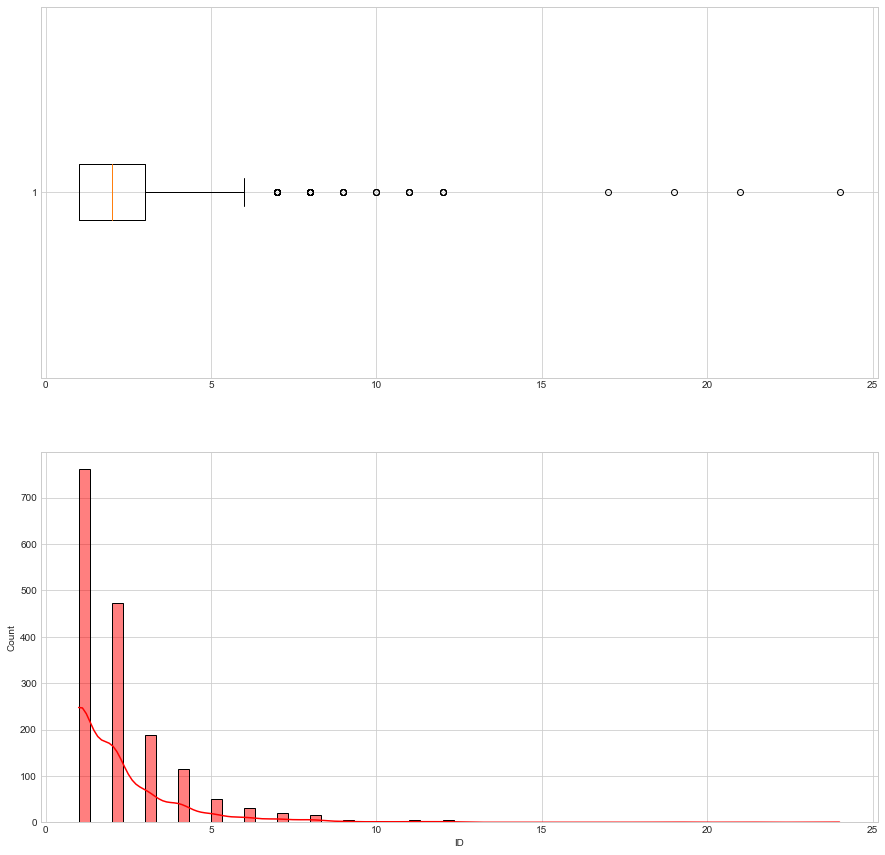

In [123]:
plt.close(fig)
#Number of Submissions 
#Number of Submissions per year per company
print(downloaded.columns)
ID_year_submissions = downloaded[["ID","Year","Version"]].drop_duplicates()
print(f"Number of ID_year_submissions_pairs: {len(ID_year_submissions)}")
Number_submissions_per_year = ID_year_submissions.groupby(["ID","Year"])["ID"].count()
print(Number_submissions_per_year)
print(Number_submissions_per_year.idxmax())
print(Number_submissions_per_year[('GLOH',2017)])
print(f"Summary statistics for number of years reported for each ID \n {Number_submissions_per_year.describe()}")

fig, ax = plt.subplots(2,figsize=(15, 15))
#fig[0].title
descript = ax[0].boxplot(Number_submissions_per_year,notch=False,vert=False)
sns.histplot(ax = ax[1],x=Number_submissions_per_year,color='red',kde=True)
#Last submission before 2021
#How many are being submitted continuously?
#Outlier characterics?